In [1]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/jtl86/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jtl86/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

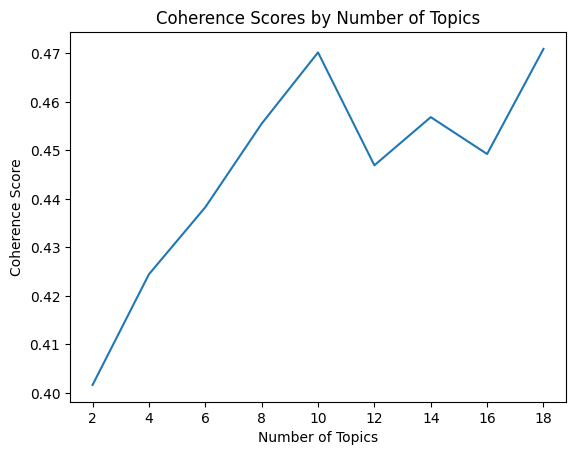

Optimal number of topics: 18


In [3]:
def preprocess(text) -> list[str]:
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens


def compute_coherence_values(dictionary, corpus, texts, *, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


def get_best_model(documents, *, start, limit, step):
    texts = [preprocess(doc) for doc in documents]
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, start=start, limit=limit, step=step)
    return model_list[coherence_values.index(max(coherence_values))]

# Sample data
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey"
]

# Usage example
optimal_topics = get_best_model(documents, start=2, limit=8, step=1)